EDA where I explore the various columns of the historical transactions dataset. 

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
df = pd.read_csv('data/historical_transactions.csv')

In [3]:
df.sample(5).T

,16940052,4406905,20507598,28287973,8389067
authorized_flag,Y,Y,Y,Y,Y
card_id,C_ID_e24775dfaa,C_ID_0f3eb56b11,C_ID_966407c88e,C_ID_f432783444,C_ID_99e43e1a7d
city_id,3,246,314,62,333
category_1,N,N,N,N,N
installments,1,0,0,0,0
category_3,B,A,A,A,A
merchant_category_id,705,222,367,80,705
merchant_id,M_ID_f8369b8d0f,M_ID_724a9fadfd,M_ID_235e546dcc,NaN,M_ID_5a4ed702d4
month_lag,-6,-12,-3,0,-11
purchase_amount,-0.656884,-0.721363,-0.633653,-0.731911,-0.724383


In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 13.1 GB



```
Columns	Description
card_id	Card identifier
month_lag	month lag to reference date
purchase_date	Purchase date
authorized_flag	Y' if approved, 'N' if denied
category_3	anonymized category
installments	number of installments of purchase
category_1	anonymized category
merchant_category_id	Merchant category identifier (anonymized )
subsector_id	Merchant category group identifier (anonymized )
merchant_id	Merchant identifier (anonymized)
purchase_amount	Normalized purchase amount
city_id	City identifier (anonymized )
state_id	State identifier (anonymized )
category_2	anonymized category
```

# Card id

In [7]:
# How many? How many unique?

df.card_id.nunique(), df.card_id.shape[0]

(325540, 29112361)

In [8]:
df.sample(5).card_id

19936530    C_ID_213b5bbc47
28561228    C_ID_f437f01c3d
1881755     C_ID_10e20aa921
24086339    C_ID_d942ee99fe
12470302    C_ID_9f228e92ae
Name: card_id, dtype: object

# Month lag

In [13]:
df.month_lag.nunique()

14

In [14]:
df.sample(5).month_lag

27512274   -1
14953806   -4
1635433    -7
13137806   -8
17492496   -2
Name: month_lag, dtype: int64

# Purchase date

In [16]:
df.purchase_date.nunique()

16395300

In [15]:
df.sample(5).purchase_date

5401121     2017-12-16 08:54:53
24600244    2017-12-22 13:13:17
6204403     2018-02-09 01:41:24
19366142    2018-01-07 12:52:41
15398050    2018-01-11 16:32:31
Name: purchase_date, dtype: object

=> Might need to round this timestamp information and extract some calendar features from it?

# Authorized flag

Whether or not the purchase has been approved.

In [18]:
df.authorized_flag.unique()

array(['Y', 'N'], dtype=object)

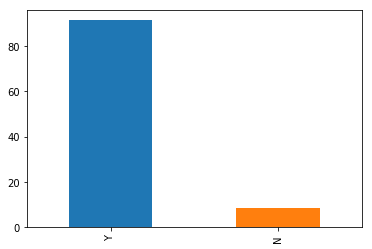

In [27]:
df.authorized_flag.value_counts(normalize=True).mul(100).plot(kind='bar')

# Category_3

An anonymized categporical feature

In [24]:
df.category_3.unique()

array(['A', 'B', 'C', nan], dtype=object)

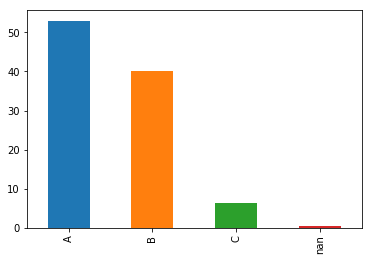

In [28]:
df.category_3.value_counts(normalize=True, dropna=False).mul(100).plot(kind='bar')